In [1]:
import altair as alt
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/SI649 Final Project/Data/Tech Layoffs US Companies That Cut Jobs In 2022 2023 And 2024.xlsx'
df_layoff = pd.read_excel(file_path)
df_layoff.head()

Mounted at /content/drive


,Company (click name for more info),No. of reported layoffs,% of company laid off,Announced/reported date,Industry,HQ,Source,Company Status,Notes,Unnamed: 9,Unnamed: 10
0,Block,NaN,0.01,2023-10-06,Fintech,San Francisco,Financial Review,Public,NaN,NaN,NaN
1,Carta,NaN,0.1,2023-01-11,Fintech,San Francisco,TechCrunch,Private,NaN,NaN,NaN
2,Stream,NaN,10-15%,2022-06-30,Communications Infrastructure,Boulder,Pragmatic Engineer,Private,NaN,NaN,NaN
3,SafeGraph,NaN,0.25,2022-06-27,"Artificial Intelligence, Machine Learning",San Francisco,SafeGraph,Private,NaN,NaN,NaN
4,Block,1000,0.1,2024-01-30,Fintech,"Oakland, CA",Business Insider,Public,"The cuts were at Cash App, Foundational and Sq...",NaN,NaN


In [3]:
hq_split = df_layoff['HQ'].str.split(',', expand=True)
df_layoff['City'] = hq_split[0]
df_layoff['State'] = hq_split[1]
df_layoff.drop(columns = ['Unnamed: 9', 'Unnamed: 10'], inplace = True)

In [4]:
df_layoff.head()

,Company (click name for more info),No. of reported layoffs,% of company laid off,Announced/reported date,Industry,HQ,Source,Company Status,Notes,City,State
0,Block,NaN,0.01,2023-10-06,Fintech,San Francisco,Financial Review,Public,NaN,San Francisco,None
1,Carta,NaN,0.1,2023-01-11,Fintech,San Francisco,TechCrunch,Private,NaN,San Francisco,None
2,Stream,NaN,10-15%,2022-06-30,Communications Infrastructure,Boulder,Pragmatic Engineer,Private,NaN,Boulder,None
3,SafeGraph,NaN,0.25,2022-06-27,"Artificial Intelligence, Machine Learning",San Francisco,SafeGraph,Private,NaN,San Francisco,None
4,Block,1000,0.1,2024-01-30,Fintech,"Oakland, CA",Business Insider,Public,"The cuts were at Cash App, Foundational and Sq...",Oakland,CA


In [5]:
import re

def clean_layoff_rate(rate):
    if isinstance(rate, str):
        # Remove all non-numeric characters except period and hyphen
        rate = re.sub(r'[^\d.-]', '', rate)
        if '-' in rate:
            low, high = rate.split('-')
            # Return the average of the low and high values divided by 100
            return (float(low) + float(high)) / 200
        elif rate:  # This will be True if `rate` is not an empty string
            # Return the rate divided by 100
            return float(rate) / 100
    # If the rate is an empty string, None, or already a number, we return it as is
    return rate if rate else None

# Clean the '% of company laid off' column
df_layoff['% of company laid off'] = df_layoff['% of company laid off'].apply(clean_layoff_rate)

# Now calculate the average layoff rate and company count per city
df_layoff_city = df_layoff.groupby('City').agg(
    Average_Layoff_Rate=('{} of company laid off'.format('%'), 'mean'),
    Company_Count=('Company (click name for more info)', 'count')
).reset_index()

df_layoff_combined = pd.merge(df_layoff, df_layoff_city, on='City', how='left')
df_layoff_combined

,Company (click name for more info),No. of reported layoffs,% of company laid off,Announced/reported date,Industry,HQ,Source,Company Status,Notes,City,State,Average_Layoff_Rate,Company_Count
0,Block,NaN,0.010,2023-10-06,Fintech,San Francisco,Financial Review,Public,NaN,San Francisco,None,0.250619,328.0
1,Carta,NaN,0.100,2023-01-11,Fintech,San Francisco,TechCrunch,Private,NaN,San Francisco,None,0.250619,328.0
2,Stream,NaN,0.125,2022-06-30,Communications Infrastructure,Boulder,Pragmatic Engineer,Private,NaN,Boulder,None,0.249444,10.0
3,SafeGraph,NaN,0.250,2022-06-27,"Artificial Intelligence, Machine Learning",San Francisco,SafeGraph,Private,NaN,San Francisco,None,0.250619,328.0
4,Block,1000,0.100,2024-01-30,Fintech,"Oakland, CA",Business Insider,Public,"The cuts were at Cash App, Foundational and Sq...",Oakland,CA,0.138000,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,Workrise,Unclear,NaN,2022-04-05,Marketplace,"Austin, TX",TechCrunch,Private,NaN,Austin,TX,0.223077,24.0
1376,Grove Collaborative,Unclear,0.170,2022-03-29,E-commerce,San Francisco,Retail Dive,Private,NaN,San Francisco,None,0.250619,328.0
1377,Knock,Unclear,0.460,2022-03-15,Proptech,New York,The Real Deal,Private,NaN,New York,None,0.409580,189.0
1378,Sezzle,Unclear,0.200,2022-03-10,Fintech,Minneapolis,Reuters,Public,NaN,Minneapolis,None,0.177500,8.0


In [6]:
df_layoff_combined.isna().sum()

Company (click name for more info)       0
No. of reported layoffs                  4
% of company laid off                  503
Announced/reported date                  0
Industry                                 0
HQ                                       3
Source                                   0
Company Status                           1
Notes                                 1234
City                                     3
State                                  885
Average_Layoff_Rate                     62
Company_Count                            3
dtype: int64

In [7]:
from vega_datasets import data
airports = data.airports()
airports = airports.rename(columns={'city': 'City'})
airports.drop_duplicates(subset='City', keep='first', inplace=True)
airports
combined_df = pd.merge(df_layoff_combined, airports, on='City')
combined_df.head()

,Company (click name for more info),No. of reported layoffs,% of company laid off,Announced/reported date,Industry,HQ,Source,Company Status,Notes,City,State,Average_Layoff_Rate,Company_Count,iata,name,state,country,latitude,longitude
0,Block,NaN,0.01,2023-10-06,Fintech,San Francisco,Financial Review,Public,NaN,San Francisco,None,0.250619,328.0,SFO,San Francisco International,CA,USA,37.619002,-122.374843
1,Carta,NaN,0.10,2023-01-11,Fintech,San Francisco,TechCrunch,Private,NaN,San Francisco,None,0.250619,328.0,SFO,San Francisco International,CA,USA,37.619002,-122.374843
2,SafeGraph,NaN,0.25,2022-06-27,"Artificial Intelligence, Machine Learning",San Francisco,SafeGraph,Private,NaN,San Francisco,None,0.250619,328.0,SFO,San Francisco International,CA,USA,37.619002,-122.374843
3,Stripe,1000,0.14,2022-11-03,Fintech,San Francisco,Bloomberg,Private,NaN,San Francisco,None,0.250619,328.0,SFO,San Francisco International,CA,USA,37.619002,-122.374843
4,Invitae,1000,NaN,2022-07-18,"Health Care, Biotech",San Francisco,GenomeWeb,Public,NaN,San Francisco,None,0.250619,328.0,SFO,San Francisco International,CA,USA,37.619002,-122.374843


In [8]:
combined_df['Average_Layoff_Rate'].describe()

count    1091.000000
mean        0.282832
std         0.154912
min         0.010000
25%         0.204000
50%         0.250619
75%         0.338571
max         1.000000
Name: Average_Layoff_Rate, dtype: float64

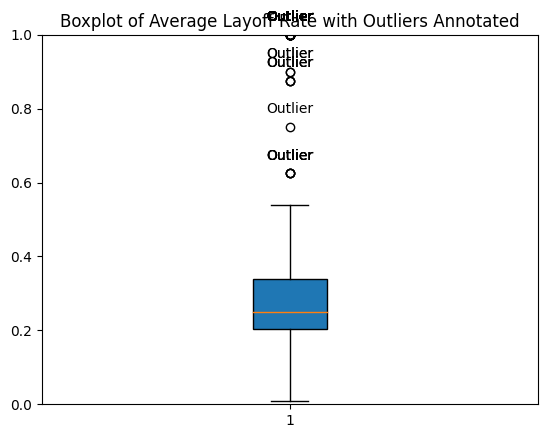

In [9]:
import matplotlib.pyplot as plt

data_without_nan = combined_df['Average_Layoff_Rate'].dropna()

plt.boxplot(data_without_nan, patch_artist=True)
Q1 = data_without_nan.quantile(0.25)
Q3 = data_without_nan.quantile(0.75)
IQR = Q3 - Q1
outliers = data_without_nan[(data_without_nan < (Q1 - 1.5 * IQR)) | (data_without_nan > (Q3 + 1.5 * IQR))]

for outlier in outliers:
    plt.annotate('Outlier', (1, outlier), textcoords="offset points", xytext=(0,10), ha='center')

plt.ylim(0, 1)
plt.title('Boxplot of Average Layoff Rate with Outliers Annotated')
plt.show()

### Visulazation 1

In [10]:
clean_combined_df = combined_df.query('Average_Layoff_Rate < 0.6')

In [11]:
us_states = alt.topo_feature(data.us_10m.url, 'states')

# Base map of the United States
background = alt.Chart(us_states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=500,
    height=300
).project('albersUsa')

# Points for cities with average layoff rates
points = alt.Chart(clean_combined_df).mark_circle().encode(
    longitude='longitude:Q',  # Replace with your actual longitude column name
    latitude='latitude:Q',    # Replace with your actual latitude column name
    size=alt.Size('Average_Layoff_Rate:Q', title='Average Layoff Rate'),
    color=alt.Color('Average_Layoff_Rate:Q', scale=alt.Scale(scheme='redblue'), legend=alt.Legend(title="Avg Layoff Rate")),
    tooltip=['City:N', 'Average_Layoff_Rate:Q', 'Company_Count:Q']  # Replace with your actual column names
)

# Combine the background map with the points__
chart = background + points

# Show the chart
chart


alt.LayerChart(...)

In [12]:
clean_combined_df['Announced/reported date'] = pd.to_datetime(clean_combined_df['Announced/reported date'])
clean_combined_df['Announced Year-Month'] = clean_combined_df['Announced/reported date'].dt.strftime('%Y-%m')
clean_combined_df['Announced Year'] = clean_combined_df['Announced/reported date'].dt.year
clean_combined_df

<ipython-input-12-fae08b25e2fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['Announced/reported date'] = pd.to_datetime(clean_combined_df['Announced/reported date'])
<ipython-input-12-fae08b25e2fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['Announced Year-Month'] = clean_combined_df['Announced/reported date'].dt.strftime('%Y-%m')
<ipython-input-12-fae08b25e2fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

,Company (click name for more info),No. of reported layoffs,% of company laid off,Announced/reported date,Industry,HQ,Source,Company Status,Notes,City,...,Average_Layoff_Rate,Company_Count,iata,name,state,country,latitude,longitude,Announced Year-Month,Announced Year
0,Block,NaN,0.010,2023-10-06,Fintech,San Francisco,Financial Review,Public,NaN,San Francisco,...,0.250619,328.0,SFO,San Francisco International,CA,USA,37.619002,-122.374843,2023-10,2023
1,Carta,NaN,0.100,2023-01-11,Fintech,San Francisco,TechCrunch,Private,NaN,San Francisco,...,0.250619,328.0,SFO,San Francisco International,CA,USA,37.619002,-122.374843,2023-01,2023
2,SafeGraph,NaN,0.250,2022-06-27,"Artificial Intelligence, Machine Learning",San Francisco,SafeGraph,Private,NaN,San Francisco,...,0.250619,328.0,SFO,San Francisco International,CA,USA,37.619002,-122.374843,2022-06,2022
3,Stripe,1000,0.140,2022-11-03,Fintech,San Francisco,Bloomberg,Private,NaN,San Francisco,...,0.250619,328.0,SFO,San Francisco International,CA,USA,37.619002,-122.374843,2022-11,2022
4,Invitae,1000,NaN,2022-07-18,"Health Care, Biotech",San Francisco,GenomeWeb,Public,NaN,San Francisco,...,0.250619,328.0,SFO,San Francisco International,CA,USA,37.619002,-122.374843,2022-07,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,Shipt,Unclear,0.035,2023-10-24,Grocery delivery,"Birmingham, AL",AL.com,Public,NaN,Birmingham,...,0.035000,1.0,BHM,Birmingham International,AL,USA,33.562943,-86.753550,2023-10,2023
1104,iSpecimen,Unclear,0.200,2023-09-06,Biotech,"Lexington, MA",Seeking Alpha,Public,NaN,Lexington,...,0.200000,1.0,19M,C A Moore,MS,USA,33.125461,-90.025557,2023-09,2023
1106,Tackle,Unclear,0.150,2023-02-15,"SaaS, cloud infrastructure","Boise, ID",Tackle,Private,NaN,Boise,...,0.150000,1.0,BOI,Boise Air Terminal,ID,USA,43.564444,-116.222778,2023-02,2023
1107,80 Acres Farms,Unclear,0.100,2023-01-18,"indoor farming, agtech","Hamilton, OH",CincinnatiInno,Private,NaN,Hamilton,...,0.100000,1.0,6S5,Ravalli County,MT,USA,46.251494,-114.125540,2023-01,2023


In [13]:
def label_half_year(date_str):
    date = pd.to_datetime(date_str)
    year = date.year
    if 1 <= date.month <= 6:
        return f'{year}-H1'
    else:
        return f'{year}-H2'

clean_combined_df['half_year'] = clean_combined_df['Announced/reported date'].apply(label_half_year)

def categorize_by_quarter(date_str):
    date = pd.to_datetime(date_str)
    year = date.year
    quarter = (date.month - 1) // 3 + 1
    return f"{year}-Q{quarter}"

# Apply it to your DataFrame
clean_combined_df['Quarter'] = clean_combined_df['Announced/reported date'].apply(categorize_by_quarter)


<ipython-input-13-550c4d1cdd2b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['half_year'] = clean_combined_df['Announced/reported date'].apply(label_half_year)
<ipython-input-13-550c4d1cdd2b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['Quarter'] = clean_combined_df['Announced/reported date'].apply(categorize_by_quarter)


In [14]:
clean_combined_df = clean_combined_df.query('Company_Count >= 2')
clean_combined_df.head()

,Company (click name for more info),No. of reported layoffs,% of company laid off,Announced/reported date,Industry,HQ,Source,Company Status,Notes,City,...,iata,name,state,country,latitude,longitude,Announced Year-Month,Announced Year,half_year,Quarter
0,Block,NaN,0.01,2023-10-06,Fintech,San Francisco,Financial Review,Public,NaN,San Francisco,...,SFO,San Francisco International,CA,USA,37.619002,-122.374843,2023-10,2023,2023-H2,2023-Q4
1,Carta,NaN,0.10,2023-01-11,Fintech,San Francisco,TechCrunch,Private,NaN,San Francisco,...,SFO,San Francisco International,CA,USA,37.619002,-122.374843,2023-01,2023,2023-H1,2023-Q1
2,SafeGraph,NaN,0.25,2022-06-27,"Artificial Intelligence, Machine Learning",San Francisco,SafeGraph,Private,NaN,San Francisco,...,SFO,San Francisco International,CA,USA,37.619002,-122.374843,2022-06,2022,2022-H1,2022-Q2
3,Stripe,1000,0.14,2022-11-03,Fintech,San Francisco,Bloomberg,Private,NaN,San Francisco,...,SFO,San Francisco International,CA,USA,37.619002,-122.374843,2022-11,2022,2022-H2,2022-Q4
4,Invitae,1000,NaN,2022-07-18,"Health Care, Biotech",San Francisco,GenomeWeb,Public,NaN,San Francisco,...,SFO,San Francisco International,CA,USA,37.619002,-122.374843,2022-07,2022,2022-H2,2022-Q3


In [15]:
background = alt.Chart(us_states).mark_geoshape(
    fill='lightgrey',
    stroke='white'
).properties(
    width=600,
    height=400
).project('albersUsa')

points = alt.Chart(clean_combined_df).mark_circle().transform_calculate(
    jittered_longitude='datum.longitude + (1 * 0.2)',
    jittered_latitude='datum.latitude + (1 * 0.2)',
    formatted_layoff_rate='format(datum.Average_Layoff_Rate * 100, ".2f") + "%"'
).encode(
    longitude='jittered_longitude:Q',
    latitude='jittered_latitude:Q',
    size=alt.Size('Company_Count:Q', title='Company Count', scale=alt.Scale(range=[150, 1500])),
    color=alt.Color('Average_Layoff_Rate:Q',
            scale=alt.Scale(scheme='redblue', reverse=True),
            legend=alt.Legend(title='Average Layoff Rate')),
    tooltip=['City:N', alt.Tooltip('formatted_layoff_rate:N', title='Average Layoff Rate'), 'Company_Count:Q']
).properties(
    title='US Cities',
    width=600,
    height=150
)


# selection = alt.selection_single(fields=['City'], on='mouseover')
selection = alt.selection_single(
    fields=['City'],
    on='mouseover'
)

map_chart = background + points.add_selection(selection)
legend = alt.Chart(clean_combined_df).mark_point().encode(
    y=alt.Y('City:N', axis=alt.Axis(orient='right')),
    color=alt.Color('Average_Layoff_Rate:Q',
            scale=alt.Scale(scheme='redblue', reverse=True),
            legend=alt.Legend(title='Average Layoff Rate'))
).add_selection(
    alt.selection_single(fields=['City'], on='mouseover', bind='legend')
)

average_layoff_rate = clean_combined_df.groupby('City', as_index=False).agg(
    Average_Layoff_Rate=('Average_Layoff_Rate', 'mean')
)

bar_chart = alt.Chart(average_layoff_rate).mark_bar().encode(
    x=alt.X('City:N', sort=alt.EncodingSortField(field="Average_Layoff_Rate", order="descending")),
    y=alt.Y('Average_Layoff_Rate:Q', axis=alt.Axis(title='Average Layoff Rate')),
    color=alt.Color('Average_Layoff_Rate:Q', scale=alt.Scale(scheme='redblue', reverse=True)),
    tooltip=['City:N', 'Average_Layoff_Rate:Q']
).properties(
    title='Company Average Layoff Rate by City',
    width=400,
    height=150
)

time_series_chart = alt.Chart(clean_combined_df).mark_area(
    line={'color':'darkblue'},
    color=alt.Gradient(
        gradient='linear',
        stops=[alt.GradientStop(color='white', offset=0),
               alt.GradientStop(color='darkblue', offset=1)],
        x1=1, x2=1, y1=1, y2=0
    )
).transform_filter(selection).transform_aggregate(
    average_rate='mean(% of company laid off)',
    groupby=['Quarter']
).encode(
    x='Quarter:N',
    y=alt.Y('average_rate:Q', axis=alt.Axis(title='City')),
).properties(
    title='Average Layoff Rate by Year',
    width=400,
    height=150
)


# Data Tables
ranked_text = alt.Chart(clean_combined_df).mark_text(align='left').transform_filter(
    selection
).transform_window(
    row_number='row_number()'
).encode(
    y=alt.Y('row_number:O',axis = None)
).transform_filter(
    alt.datum.row_number <= 10
).properties(
    title='Data Detail',
    width=100,
    height=150
)

company = ranked_text.encode(text='Company (click name for more info):N').properties(
    title='Company'
)
status = ranked_text.encode(text='Company Status:N').properties(
    title='Company Status'
)
city = ranked_text.encode(text='City:N').properties(
    title='City'
)
state = ranked_text.encode(text='state:N').properties(
    title='State'
)
date = ranked_text.encode(text='Announced/reported date:T').properties(
    title='Announced/reported date'
)
industry = ranked_text.encode(text='Industry:N').properties(
    title='Industry'
)
source = ranked_text.encode(text='Source:N').properties(
    title='Source'
)
average_rate = ranked_text.encode(text='% of company laid off:Q').properties(
    title='% of company laid off'
)
text = alt.hconcat(company, status, city, state, date, industry, source, average_rate)

dashboard = (((map_chart) | (time_series_chart & bar_chart)) & (text)).configure_view(
    strokeWidth=0
)

dashboard

alt.VConcatChart(...)

### Visulazation 2

In [16]:
file_path2 = '/content/drive/My Drive/SI649 Final Project/Data/layoffs_data(3).csv'
df_worldlayoff = pd.read_csv(file_path2)
df_filtered_worldlayoff = df_worldlayoff[~df_worldlayoff['Industry'].isin(['Other', 'Unknown'])]
df_filtered_worldlayoff = df_filtered_worldlayoff[~df_filtered_worldlayoff['Stage'].isin(['Unknown'])]
df_filtered_worldlayoff

,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off
0,Fisker,Los Angeles,Transportation,0.15,2024-02-29,https://techcrunch.com/2024/02/29/fisker-layof...,1700.0,Post-IPO,2024-02-29 23:35:20,United States,NaN,Unknown
1,Electronic Arts,SF Bay Area,Consumer,0.05,2024-02-28,https://www.cnbc.com/2024/02/28/ea-layoffs-com...,2.0,Post-IPO,2024-02-29 00:45:00,United States,670.0,Unknown
2,Vacasa,Portland,Travel,0.05,2024-02-28,https://www.oregonlive.com/business/2024/02/po...,834.0,Post-IPO,2024-02-29 17:22:37,United States,320.0,Unknown
3,Treasury Prime,SF Bay Area,Finance,0.40,2024-02-28,https://www.bankingdive.com/news/treasury-prim...,71.0,Series C,2024-02-29 00:48:03,United States,40.0,Unknown
5,Sony Interactive,SF Bay Area,Consumer,0.08,2024-02-27,https://www.theverge.com/2024/2/27/24084494/so...,NaN,Subsidiary,2024-02-27 18:49:42,United States,900.0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
3479,Help.com,Austin,Support,1.00,2020-03-16,LinkedIn,6.0,Seed,2020-04-16 06:36:06,United States,16.0,Unknown
3480,Service,Los Angeles,Travel,1.00,2020-03-16,https://techcrunch.com/2020/03/16/travel-savin...,5.1,Seed,2020-08-31 15:17:26,United States,NaN,Unknown
3482,Panda Squad,SF Bay Area,Consumer,0.75,2020-03-13,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,6.0,Unknown
3483,Tamara Mellon,Los Angeles,Retail,0.40,2020-03-12,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,20.0,Unknown


In [23]:
nearest = alt.selection(type='interval')

# Create the bubble chart
bubble = alt.Chart(df_filtered_worldlayoff).transform_aggregate(
    company_count='count()',
    average_percentage='average(Percentage)',
    groupby=['Stage', 'Industry']
).transform_filter(
    alt.datum.company_count >= 10  # This line filters out rows where the count is less than 10
).transform_calculate(
    formatted_average_percentage='format(datum.average_percentage * 100, ".2f") + "%"'
).mark_circle().encode(
    alt.X('Stage:N', axis=alt.Axis(title='Stage')),
    alt.Y('Industry:N', axis=alt.Axis(title='Industry')),
    # Here you can adjust the range of the size, e.g., range=[100, 1000] to make the bubbles larger
    size=alt.Size('company_count:Q',
           scale=alt.Scale(range=[50, 500]),
           legend=alt.Legend(title='Number of Companies')),
    color=alt.Color('average_percentage:Q',
            scale=alt.Scale(scheme='redblue', reverse=True),
            legend=alt.Legend(title='Average Percentage of Layoff')),
    tooltip=['Stage', 'Industry', 'company_count:Q', 'formatted_average_percentage:N']
).add_selection(
    nearest
).interactive().properties(
    title='World Layoff Data Visualiazation of Bubble Chart',
    width=500,
    height=400
)

stacked_bars = alt.Chart(df_filtered_worldlayoff).mark_bar().encode(
    x=alt.X('Industry:N', axis=alt.Axis(title='Industry')),
    y=alt.Y('count():Q', axis=alt.Axis(title='Count of Company')),
    color=alt.Color('Stage:N', scale=alt.Scale(scheme='category20b'),
                    legend=alt.Legend(title='Stage')),
    tooltip=[alt.Tooltip('Industry:N'), alt.Tooltip('Stage:N'), alt.Tooltip('count():Q')]
).transform_filter(
    nearest
).properties(
    title='Distribution of Companies by Stage and Industry',
    width=600,
    height=400
)

combined = alt.hconcat(
    bubble,
    stacked_bars,
    spacing=30
).resolve_legend(
    color='independent',
    size='independent'
)

combined


alt.HConcatChart(...)

In [24]:
combined.save('combined.html')

In [25]:
dashboard.save('Index4.html')